Actividad: Regresión Lineal 

In [146]:
##Clear dataframe 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/home/alanv/Documents/7/mate/ds_salaries.csv')
df = df.drop(df.columns[0],axis=1)
df = df.drop(['work_year','job_title','salary_currency','employee_residence', 'company_location', 'company_size'], axis=1)
df

,experience_level,employment_type,salary,salary_in_usd,remote_ratio
0,MI,FT,70000,79833,0
1,SE,FT,260000,260000,0
2,SE,FT,85000,109024,50
3,MI,FT,20000,20000,0
4,SE,FT,150000,150000,50
...,...,...,...,...,...
602,SE,FT,154000,154000,100
603,SE,FT,126000,126000,100
604,SE,FT,129000,129000,0
605,SE,FT,150000,150000,100


In [147]:
## More rows than columns
df.shape

(607, 5)

In [148]:
## Checking for nulls
df.isnull().sum()


experience_level    0
employment_type     0
salary              0
salary_in_usd       0
remote_ratio        0
dtype: int64

In [149]:
## Dummies variables for categorical variables

dummiesExperience=pd.get_dummies(df['experience_level'], prefix='experience_level')
dummiesEmployment=pd.get_dummies(df['employment_type'], prefix='employment_type')

##?


#dummiesExperience.drop('experience_level_EN',axis=1,inplace=True)
#dummiesEmployment.drop('employment_type_CT',axis=1,inplace=True)

## Add dummies to dataset

df=pd.concat([df,dummiesEmployment,dummiesExperience], axis=1)

## Remove categorical variables

df.drop('experience_level',axis=1,inplace=True)
df.drop('employment_type',axis=1,inplace=True)
df

,salary,salary_in_usd,remote_ratio,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,70000,79833,0,False,False,True,False,False,False,True,False
1,260000,260000,0,False,False,True,False,False,False,False,True
2,85000,109024,50,False,False,True,False,False,False,False,True
3,20000,20000,0,False,False,True,False,False,False,True,False
4,150000,150000,50,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
602,154000,154000,100,False,False,True,False,False,False,False,True
603,126000,126000,100,False,False,True,False,False,False,False,True
604,129000,129000,0,False,False,True,False,False,False,False,True
605,150000,150000,100,False,False,True,False,False,False,False,True


In [150]:
#find correlation in order to estandarizate data

correlacion = df.corr()
alta_corr = np.where((correlacion > 0.95) & (correlacion < 1))
baja_corr = np.where((correlacion > -0.95) & (correlacion < -1))

print(alta_corr, baja_corr)
#there is not low or high correlation
correlacion

(array([], dtype=int64), array([], dtype=int64)) (array([], dtype=int64), array([], dtype=int64))


,salary,salary_in_usd,remote_ratio,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
salary,1.000000,-0.083906,-0.014608,-0.008268,-0.014568,0.025685,-0.020006,-0.015845,0.014130,0.074626,-0.065995
salary_in_usd,-0.083906,1.000000,0.132122,0.092907,-0.073863,0.091819,-0.144627,-0.294196,0.259866,-0.252024,0.343513
remote_ratio,-0.014608,0.132122,1.000000,0.065149,-0.016865,-0.023834,-0.002935,-0.010490,0.041208,-0.127850,0.113071
employment_type_CT,-0.008268,0.092907,0.065149,1.000000,-0.007423,-0.506989,-0.011795,0.066013,0.070739,-0.028817,-0.047768
employment_type_FL,-0.014568,-0.073863,-0.016865,-0.007423,1.000000,-0.453089,-0.010541,-0.033537,-0.017229,0.068108,-0.034520
employment_type_FT,0.025685,0.091819,-0.023834,-0.506989,-0.453089,1.000000,-0.719987,-0.167828,-0.008698,-0.006597,0.128381
employment_type_PT,-0.020006,-0.144627,-0.002935,-0.011795,-0.010541,-0.719987,1.000000,0.204028,-0.027379,-0.013805,-0.119762
experience_level_EN,-0.015845,-0.294196,-0.010490,0.066013,-0.033537,-0.167828,0.204028,1.000000,-0.087108,-0.302761,-0.381033
experience_level_EX,0.014130,0.259866,0.041208,0.070739,-0.017229,-0.008698,-0.027379,-0.087108,1.000000,-0.155539,-0.195751
experience_level_MI,0.074626,-0.252024,-0.127850,-0.028817,0.068108,-0.006597,-0.013805,-0.302761,-0.155539,1.000000,-0.680373


In [151]:
#Scaler
scaler=StandardScaler()
df_estandar=scaler.fit_transform(df)
df_estandar=pd.DataFrame(df_estandar,columns=df.columns)

In [152]:
from sklearn.model_selection import train_test_split
entrenamiento, prueba = train_test_split(df, test_size=0.20)
entrenamiento

,salary,salary_in_usd,remote_ratio,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
470,135000,135000,100,False,False,True,False,False,False,True,False
180,1672000,22611,0,False,False,True,False,False,False,True,False
434,80000,104702,100,False,False,True,False,False,False,True,False
476,185100,185100,100,False,False,True,False,False,False,False,True
337,243900,243900,100,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
30,51999,59303,100,False,False,True,False,False,False,True,False
270,72500,72500,100,False,False,True,False,True,False,False,False
119,200000,200000,100,False,False,True,False,False,False,True,False
456,105000,105000,100,False,False,True,False,False,False,False,True


In [153]:
df.columns

Index(['salary', 'salary_in_usd', 'remote_ratio', 'employment_type_CT',
       'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
       'experience_level_EN', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE'],
      dtype='object')

In [154]:
import statsmodels.formula.api as smf
modelo=smf.ols(formula='salary_in_usd~salary+remote_ratio+employment_type_CT+employment_type_FL+employment_type_FT+employment_type_PT+experience_level_EN+experience_level_EX+experience_level_MI+experience_level_SE',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     21.73
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           2.99e-28
Time:                        17:55:19   Log-Likelihood:                -6026.3
No. Observations:                 485   AIC:                         1.207e+04
Df Residuals:                     476   BIC:                         1.211e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [162]:
y_aprox= 80660 - 129000*prueba['employment_type_CT'] - 0*prueba['employment_type_FL'] + 0*prueba['employment_type_FT'] - 0 * prueba['employment_type_PT'] - 36000*prueba['experience_level_EN'] + 88550*prueba['experience_level_EX'] - 0*prueba['experience_level_MI'] + 37860*prueba['experience_level_SE'] -0*prueba['salary'] + 0*prueba['remote_ratio']
y_aprox

216     44660
212     80660
160    169210
71      80660
205     80660
        ...  
274    118520
124     44660
49      80660
574    118520
335    118520
Length: 122, dtype: int64

In [163]:
tabla=pd.DataFrame({'Real':prueba['salary_in_usd'],'Prediccion':y_aprox,'Errores':prueba['salary_in_usd']-y_aprox})
tabla

,Real,Prediccion,Errores
216,28609,44660,-16051
212,66022,80660,-14638
160,230000,169210,60790
71,42197,80660,-38463
205,12901,80660,-67759
...,...,...,...
274,77684,118520,-40836
124,10354,44660,-34306
49,70139,80660,-10521
574,210000,118520,91480


Text(0, 0.5, 'Prediccion')

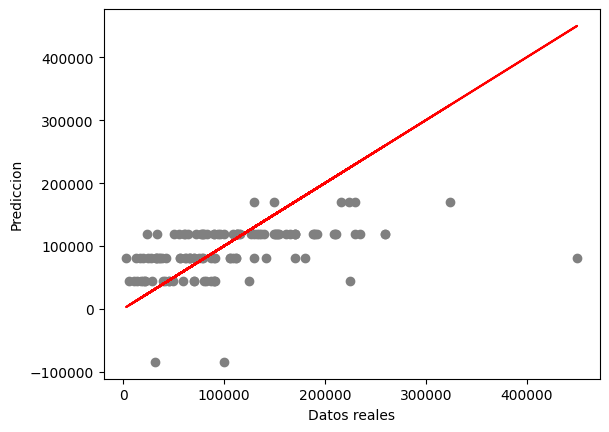

In [164]:
import matplotlib.pyplot as plt
plt.scatter(prueba['salary_in_usd'],y_aprox,color='gray')
plt.plot(prueba['salary_in_usd'],prueba['salary_in_usd'],color='red')
plt.xlabel("Datos reales")
plt.ylabel("Prediccion")

Text(0, 0.5, 'Valor del residuo')

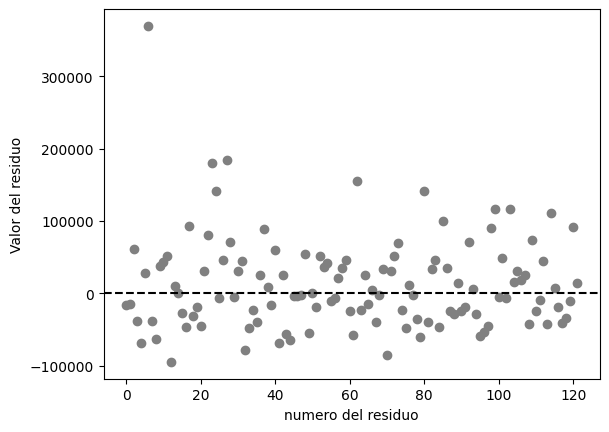

In [165]:
l_residuos=len(tabla['Errores'])
plt.scatter(range(l_residuos),tabla['Errores'],color='gray')
plt.axhline(y=0,linestyle='--',color='black')
plt.xlabel("numero del residuo")
plt.ylabel("Valor del residuo")

Text(0, 0.5, 'Frecuencia (prueba)')

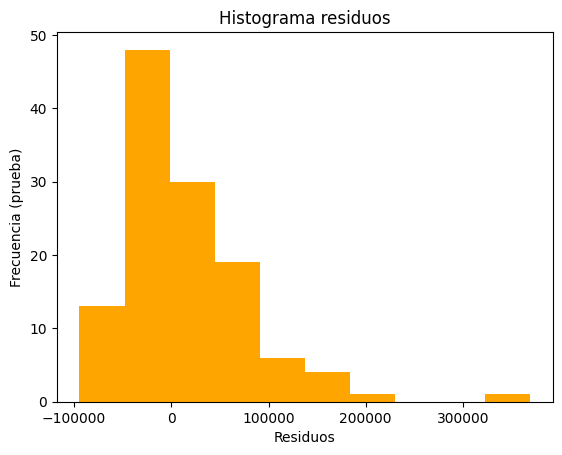

In [166]:
plt.hist(x=tabla['Errores'],color='orange')
plt.title('Histograma residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia (prueba)')

In [167]:
media=tabla['Errores'].mean()
std=tabla['Errores'].std()
Errores_est=(tabla['Errores']-media)/std
import statsmodels.api as sm
from scipy import stats
stats.kstest(Errores_est,'norm')

KstestResult(statistic=0.0970097845992266, pvalue=0.1883733165207748, statistic_location=0.5907688532994928, statistic_sign=1)

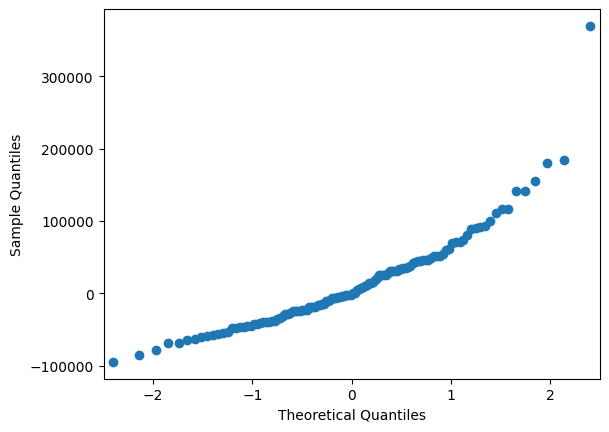

In [168]:
import statsmodels.api as sm
from scipy import stats
QQ = sm.qqplot(tabla['Errores'], stats.norm)

In [1]:
a = 9.35e+2
print(a)

935.0
